#one-time

In [ ]:
#@title
%cd '/content/drive/Shareddrives/vid tokenization/aist++'

In [ ]:
#@title
! git clone https://github.com/likenneth/acton.git

In [ ]:
#@title
# !wget https://raw.githubusercontent.com/google/aistplusplus_api/main/downloader.py
!python downloader.py --download_folder='/content/drive/Shareddrives/vid tokenization/aist++' --num_processes=5


In [ ]:
import os
import numpy as np

subset_path = os.walk('/content/drive/Shareddrives/vid tokenization/aistpp_subset/aistplusplus/annotations/keypoints3d')
subset_files=[]
for root, directories, files in subset_path:
    for file in files:
        subset_files.append(file[:-4])

mapping_og_path = '/content/drive/Shareddrives/vid tokenization/aistpp_subset/aistplusplus/annotations/cameras/mapping_og.txt'
og_mapping = np.loadtxt(mapping_og_path, dtype=str)

mapping_subset_path = '/content/drive/Shareddrives/vid tokenization/aistpp_subset/aistplusplus/annotations/cameras/mapping.txt'
subset_mapping = [[seq_name, env_name] for (seq_name, env_name) in env_mapping 
                 if seq_name in subset_files]
np.savetxt(mapping_subset_path, subset_mapping, '%s' )

ignore_path = '/content/drive/Shareddrives/vid tokenization/aistpp_subset/aistplusplus/annotations/ignore_list.txt'
ignore_list = [seq_name for (seq_name, env_name) in env_mapping 
                 if seq_name not in subset_files]

np.savetxt(ignore_path, ignore_list, '%s' )

#start here

In [ ]:
%cd '/content/drive/Shareddrives/vid tokenization'

/content/drive/Shareddrives/vid tokenization


In [ ]:
!pip install git+https://github.com/PyTorchLightning/pytorch-lightning
# !pip install torchtext==0.8.0 torch==1.7.1 pytorch-lightning==1.2.2
!pip install lightning-bolts
!pip install torchvision  
!apt-get install ffmpeg  
!pip install aniposelib wandb gym test-tube ffmpeg-python matplotlib easydict scikit-learn   
# !pip install pytorch-lightning  

In [ ]:
#@title
import torch
import pytorch_lightning
import pl_bolts

##training on subset

In [ ]:
%cd '/content/drive/Shareddrives/vid tokenization/acton'

/content/drive/Shareddrives/vid tokenization/acton


In [ ]:
!python pretrain.py --cfg configs/tan.yaml --data_dir '/content/drive/Shareddrives/vid tokenization/aistpp_subset/aistplusplus'

Global seed set to 1
{'CLUSTER': {'CKPT': -1,
             'GENRE': 10,
             'K_MAX': 160,
             'K_MIN': 150,
             'TIMES': 10,
             'TYPE': 'kmeans_skl'},
 'NAME': 'tan2',
 'PRETRAIN': {'ALGO': 'TAN',
              'ARCH': {'ARCH': 'Transformer',
                       'DIM': 512,
                       'DROPOUT': 0.0,
                       'LAYER': 3},
              'DATA': {'AUG_ROT_PROB': 1,
                       'AUG_ROT_RANGE': 0.2,
                       'AUG_SHIFT_PROB': 1,
                       'AUG_SHIFT_RANGE': 0.4,
                       'AUG_TIME_PROB': 1,
                       'AUG_TIME_RATE': 1.99,
                       'BS': 32,
                       'DATA_DIR': '/content/drive/Shareddrives/vid '
                                   'tokenization/aistpp_subset/aistplusplus',
                       'GENRE': 10,
                       'MAX_LENGTH': 64,
                       'MIN_LENGTH': 64,
                       'NUM_WORKERS': 4,
   

In [ ]:
!python cluster.py --cfg configs/tan.yaml --data_dir '/content/drive/Shareddrives/vid tokenization/aistpp_subset/aistplusplus'

Global seed set to 0
Global seed set to 1
{'CLUSTER': {'CKPT': -1,
             'GENRE': 10,
             'K_MAX': 160,
             'K_MIN': 150,
             'TIMES': 10,
             'TYPE': 'kmeans_skl'},
 'NAME': 'tan',
 'PRETRAIN': {'ALGO': 'TAN',
              'ARCH': {'ARCH': 'Transformer',
                       'DIM': 512,
                       'DROPOUT': 0.0,
                       'LAYER': 3},
              'DATA': {'AUG_ROT_PROB': 1,
                       'AUG_ROT_RANGE': 0.2,
                       'AUG_SHIFT_PROB': 1,
                       'AUG_SHIFT_RANGE': 0.4,
                       'AUG_TIME_PROB': 1,
                       'AUG_TIME_RATE': 1.99,
                       'BS': 32,
                       'DATA_DIR': '/content/drive/Shareddrives/vid '
                                   'tokenization/aistpp_subset/aistplusplus',
                       'GENRE': 10,
                       'MAX_LENGTH': 64,
                       'MIN_LENGTH': 64,
                       '

In [ ]:
import pandas as pd

K = 150
exp_name = "tan"
word_df = pd.read_pickle(f"./logs/{exp_name}/advanced_tr_{K}.pkl")

In [ ]:
word_df[word_df['word']=='agz']

,idx,word,length,y,name
1,1,agz,14,0,gWA_sFM_cAll_d25_mWA2_ch03
82,1,agz,50,1,gWA_sFM_cAll_d25_mWA3_ch04
173,5,agz,7,2,gWA_sFM_cAll_d25_mWA5_ch06
175,7,agz,1,2,gWA_sFM_cAll_d25_mWA5_ch06
180,12,agz,36,2,gWA_sFM_cAll_d25_mWA5_ch06
182,14,agz,31,2,gWA_sFM_cAll_d25_mWA5_ch06
249,81,agz,17,2,gWA_sFM_cAll_d25_mWA5_ch06
285,1,agz,8,3,gWA_sFM_cAll_d25_mWA5_ch07
475,71,agz,20,5,gWA_sFM_cAll_d26_mWA3_ch11
692,2,agz,18,9,gWA_sFM_cAll_d27_mWA0_ch15


In [ ]:
word_df[word_df["name"]=="gWA_sFM_cAll_d27_mWA2_ch21"]


,idx,word,length,y,name
1109,1,aei,50,13,gWA_sFM_cAll_d27_mWA2_ch21
1110,2,ahc,9,13,gWA_sFM_cAll_d27_mWA2_ch21
1111,3,afn,77,13,gWA_sFM_cAll_d27_mWA2_ch21
1112,4,ahd,24,13,gWA_sFM_cAll_d27_mWA2_ch21
1113,5,agk,18,13,gWA_sFM_cAll_d27_mWA2_ch21
...,...,...,...,...,...
1172,64,abp,16,13,gWA_sFM_cAll_d27_mWA2_ch21
1173,65,ael,46,13,gWA_sFM_cAll_d27_mWA2_ch21
1174,66,adr,32,13,gWA_sFM_cAll_d27_mWA2_ch21
1175,67,ael,102,13,gWA_sFM_cAll_d27_mWA2_ch21


In [ ]:
import numpy as np
import yaml
from pathlib import Path
import random

import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import pickle, time
import json, math
import pandas as pd

from src.data.dataset.loader import AISTDataset
from src.data.dataset import base
from src.data.dataset.cluster_misc import lexicon
from src.algo.kmeans_skl import Clusterer, get_best_clusterer

from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
from src.data.dataset.cluster_misc import get_names
colours = list(mcolors.TABLEAU_COLORS)
classes = lexicon

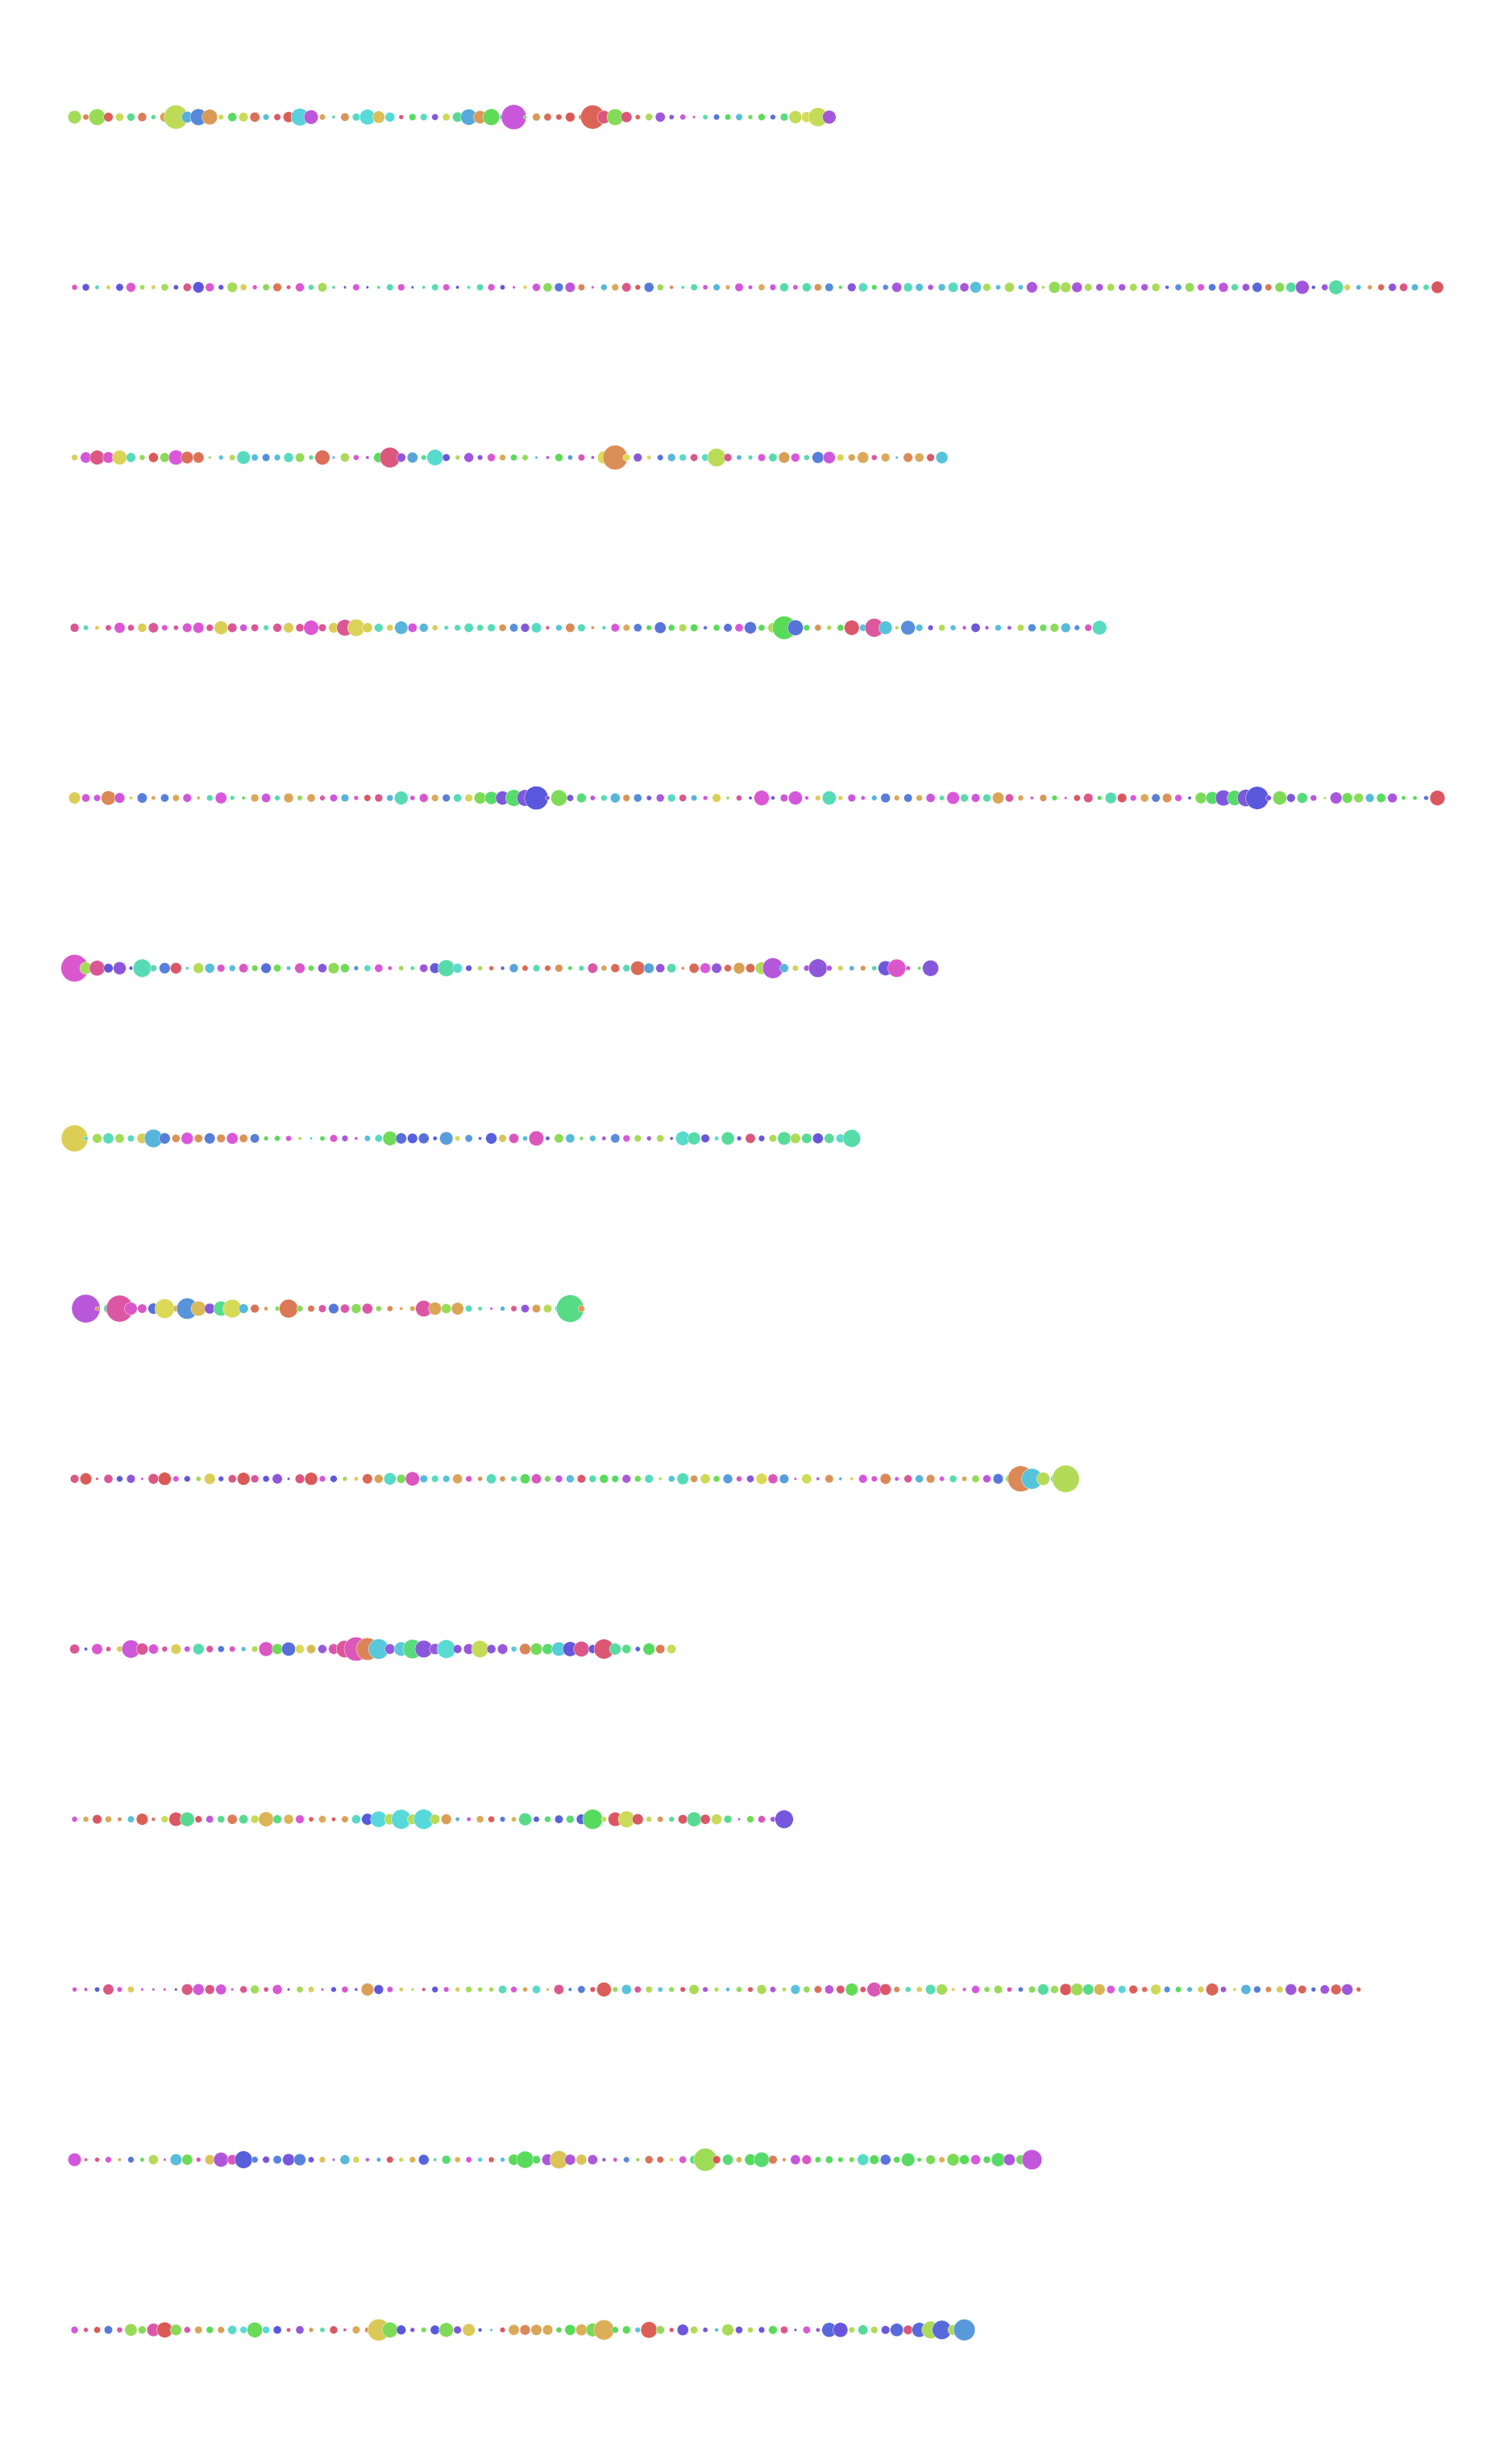

In [ ]:
fig, ax = plt.subplots(figsize=(30, 50), dpi= 80, facecolor='w', edgecolor='k')
ax.axis('off')
words = list(word_df["word"])
perm = np.random.permutation(len(words))
mapping = {word: per for word, per in zip(words, perm)}
new_word_df = pd.DataFrame(columns=word_df.columns)
for rows in word_df.iterrows():
    rows = dict(rows[1])
    rows["word"] = mapping[rows["word"]]
    new_word_df = new_word_df.append(rows, ignore_index=True)
gg = sns.scatterplot(data=new_word_df, x="idx", y="y", hue="word", size="length", ax=ax, sizes=(10, 1000), legend=0, palette=sns.color_palette("hls", len(set(new_word_df["word"]))))